Visualization for others
Group Name: Insomniac Minions
By: Janki Thakkar, Neha Taneja, Pujeethaa Jakka, Sayed Shazeb Hussain

We have considered 2 datasets, 
1. Women's shoes 
2.Men's shoes. 
Both these datasets have around 47 columns and around 19000 plus rows. 
This data has variuos features of the shoes for women and men ranging from prices, colors, brand, category, manufacturer,sizes, images, features, sale info etc. Of all these columns, for this exploratory study I have taken price, color, and brand. There are different types of variables in this dataset, price(continuous), quantity(continuous), isbn(discrete), upc(discrete) etc are of numerical data types, categorical variables are - color, sale information, currency, categories.

Here in this study, we are
- Analysing the most Popular brands by Gender
- The average price of the 15 most popular brands for Men and Women
- Price distrubution by Gender
- Most popular colors
- Price distribution by color


This dataset has the image Urls for the shoes, but most of them were broken so we were not able to put it to best use
Data was not very clean, so we spent a lot of time in cleaning and preprocessing data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import bqplot.pyplot as bqplt
import pandas as pd
import bqplot as bq
import ipywidgets
from wordcloud import WordCloud,STOPWORDS
import re

In [2]:
#Loading all the relevant data files
mens_shoes = pd.read_csv("Men_shoes.csv")

womens_shoes = pd.read_csv("Women_shoes.csv")

shoes_data = pd.read_csv("Shoes_Data.csv")

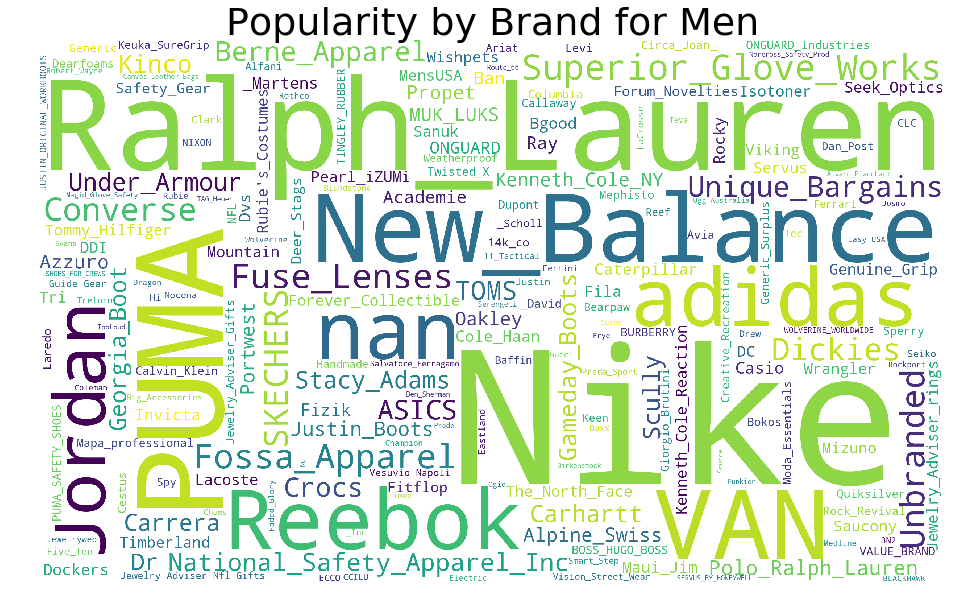

In [3]:
#Generating wordcloud to understand and analyse the most popupar brands for Men
#We could see that many of the values are nan (not a number)
mens_shoes['brand'] = mens_shoes['brand'].map(lambda x: re.sub(r' ','_',str(x)))
wordcloud = WordCloud(background_color="white",
                          width=2500, height=1500,
                          collocations = False,
                          stopwords=STOPWORDS).generate(' '.join(mens_shoes['brand']))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Popularity by Brand for Men", size = 38)
plt.show()

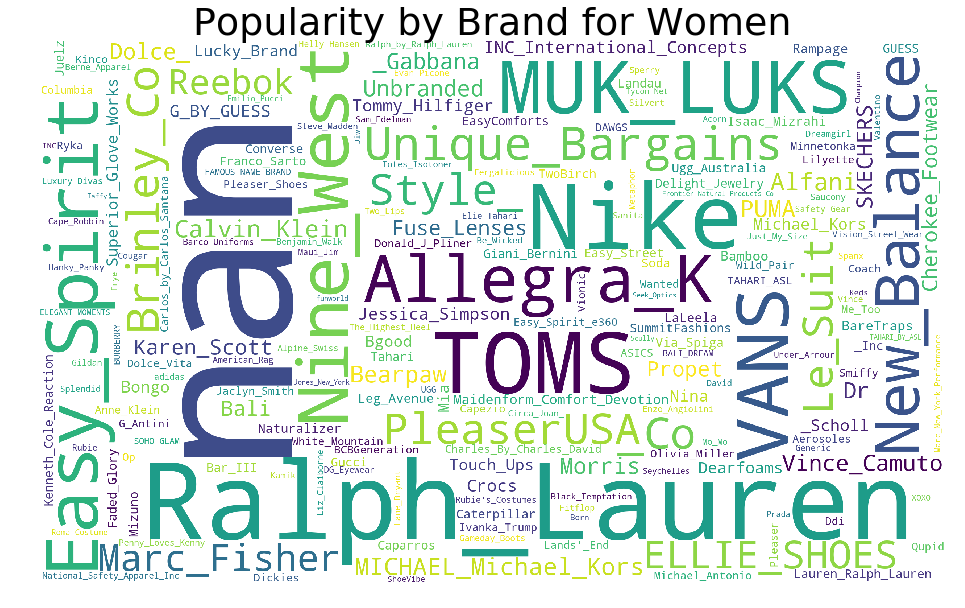

In [4]:
#Generating wordcloud to understand and analyse the most popupar brands for Women
#We could see that many of the values are nan (not a number)
womens_shoes['brand'] = womens_shoes['brand'].map(lambda x: re.sub(r' ','_',str(x)))
wordcloud = WordCloud(background_color="white",
                          width=2500, height=1500,
                          collocations = False,
                          stopwords=STOPWORDS).generate(' '.join(womens_shoes['brand']))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Popularity by Brand for Women", size = 38)
plt.show()

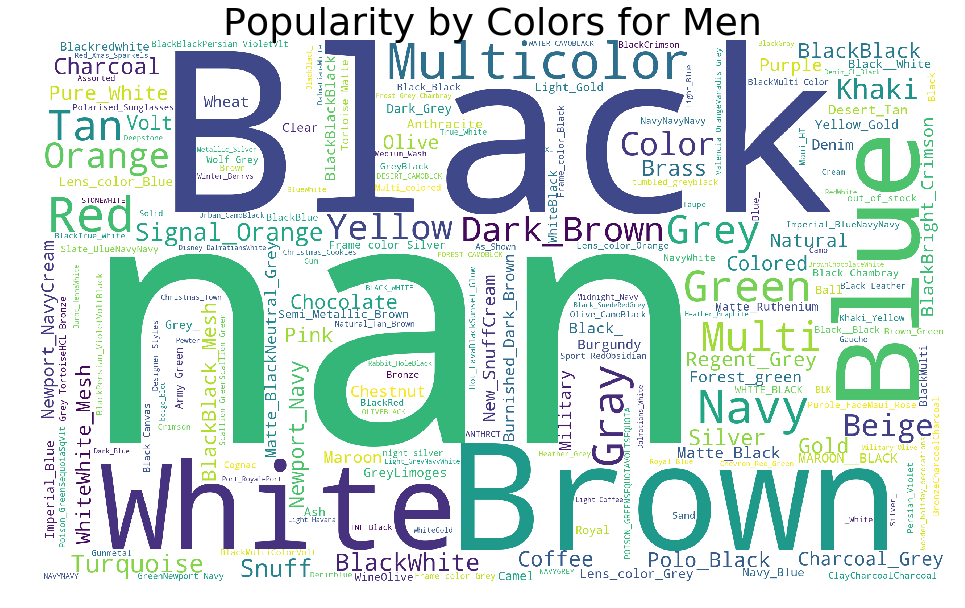

In [5]:
#Generating wordcloud to understand and analyse the most popupar Colors for Men
#We could see that many of the values are nan (not a number)
mens_shoes['colors'] = mens_shoes['colors'].map(lambda x: re.sub(r' ','_',str(x)))
wordcloud = WordCloud(background_color="white",
                          width=2500, height=1500,
                          collocations = False,
                          stopwords=STOPWORDS).generate(' '.join(mens_shoes['colors']))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Popularity by Colors for Men", size = 38)
plt.show()

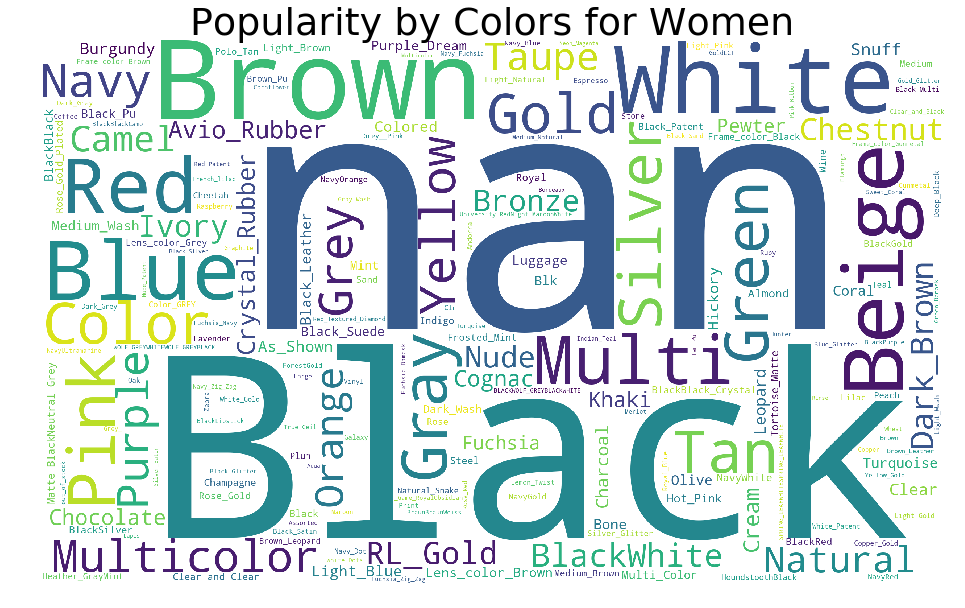

In [6]:
#Generating wordcloud to understand and analyse the most popupar colors for Women
#We could see that many of the values are nan (not a number)
womens_shoes['colors'] = womens_shoes['colors'].map(lambda x: re.sub(r' ','_',str(x)))
wordcloud = WordCloud(background_color="white",
                          width=2500, height=1500,
                          collocations = False,
                          stopwords=STOPWORDS).generate(' '.join(womens_shoes['colors']))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Popularity by Colors for Women", size = 38)
plt.show()

In [7]:
#Keeping the columns required for our analysis
shoes_data.columns = ["Index", "Id", "Brand", "Categories", "Colors", "Min Price", "Max Price", "isSale", "Currency", "Gender"]
del shoes_data["Index"]

In [8]:
#Handling different currencies to USD using the latest available conversion rate.
shoes_data.loc[shoes_data["Currency"] == "AUD", "Min Price"] = shoes_data.loc[shoes_data["Currency"] == "AUD", "Min Price"]*0.73
shoes_data.loc[shoes_data["Currency"] == "CAD", "Min Price"] = shoes_data.loc[shoes_data["Currency"] == "CAD", "Min Price"]*0.76
shoes_data.loc[shoes_data["Currency"] == "GBP", "Min Price"] = shoes_data.loc[shoes_data["Currency"] == "GBP", "Min Price"]*1.3

shoes_data.loc[shoes_data["Currency"] == "AUD", "Max Price"] = shoes_data.loc[shoes_data["Currency"] == "AUD", "Max Price"]*0.73
shoes_data.loc[shoes_data["Currency"] == "CAD", "Max Price"] = shoes_data.loc[shoes_data["Currency"] == "CAD", "Max Price"]*0.76
shoes_data.loc[shoes_data["Currency"] == "GBP", "Max Price"] = shoes_data.loc[shoes_data["Currency"] == "GBP", "Max Price"]*1.3

In [9]:
#Changing the currency column value
shoes_data["Currency"] = "USD"

In [10]:
#Getting average price from minimum and maximum price columns
shoes_data["Avg Price"] = (shoes_data["Min Price"] + shoes_data["Max Price"])/2

In [11]:
#Getting the data for scatter plot
scatter_data = shoes_data.groupby("Gender")["Brand"].value_counts().reset_index(name = "Count")
scatter_data["Avg Price"] = shoes_data.groupby(["Gender", "Brand"])["Avg Price"].mean().values

In [12]:
#Filtering data for displaying most popular colirs by brand
colors = shoes_data["Colors"].value_counts()[:6].index
colors.tolist
colors_data = shoes_data[shoes_data["Colors"].isin(colors)]
colors_data = colors_data[colors_data["Colors"] != "Not Available"]
tab_data = colors_data.groupby(["Gender", "Brand", "Colors"])["Avg Price"].mean().unstack()
bar_data = colors_data.groupby(["Colors"])["Gender"].value_counts().unstack().reset_index()

In [13]:
#Generating the figure for bar chart
col_sc_bar = bq.OrdinalColorScale()
x_sc_bar = bq.OrdinalScale()
y_sc_bar = bq.LinearScale()


x_ax_bar = bq.Axis(scale = x_sc_bar, orientation="vertical", label = "Colors")
y_ax_bar = bq.Axis(scale = y_sc_bar, label = "Count")
c_ax_bar = bq.ColorAxis(scale = col_sc_bar, orientation = 'vertical', side = 'right')
tooltip_bar = bq.Tooltip(fields = ["x", "y"], formats = ["", ".0f", ".2f"], labels = ["Color", "Count"])

bar_fig = bq.Figure(axes = [x_ax_bar,y_ax_bar,c_ax_bar], title = "Popularity by Colors",
                     layout={"width":"500px", "height":"400px"},
                     fig_margin = {'top':50, 'bottom':95, 'left':80, 'right':20}, 
                    title_style = {"font-size" : "15px"})

In [14]:
#Generating the figure for showing average price of most popular brands by Gender
col_sc = bq.OrdinalColorScale()
x_sc = bq.OrdinalScale()
y_sc = bq.LinearScale()
size_sc = bq.LinearScale()

x_ax = bq.Axis(scale = x_sc, tick_rotate = 310, tick_style = {"text-anchor" : "end"})
y_ax = bq.Axis(scale = y_sc, orientation="vertical", label = "Average Price")
c_ax = bq.ColorAxis(scale = col_sc, orientation = 'vertical', side = 'right')
tooltip = bq.Tooltip(fields = ["x", "y", "size"], formats = ["", ".0f", ".2f"], labels = ["Brand", "Average Price", "Count"])


scatter_fig = bq.Figure(axes = [c_ax, x_ax,y_ax], layout={"width":"500px", "height":"400px"},
                        fig_margin = {'top':50, 'bottom':100, 'left':80, 'right':20}, 
                        title = "Average price of the most popular brands", title_style = {"font-size" : "15px"})

In [15]:
#Generating the figure fro displaying the price distribution for Gender
x_sc_hist = bq.LinearScale()
y_sc_hist = bq.LinearScale()


x_ax_hist = bq.Axis(scale = x_sc_hist, tick_rotate = 310, tick_style = {"text-anchor" : "end"}, label = "Prices")
y_ax_hist = bq.Axis(scale = y_sc_hist, orientation="vertical")


hist_fig = bq.Figure(axes = [x_ax_hist, y_ax_hist], layout={"width":"500px", "height":"400px"},
                     fig_margin = {'top':50, 'bottom':95, 'left':80, 'right':20},
                    title = "Price distribution by Gender", title_style = {"font-size" : "15px"})

In [16]:
#Generating the figure fro displaying the price distribution for most popular colors
x_sc_color_hist = bq.LinearScale()
y_sc_color_hist = bq.LinearScale()

x_ax_color_hist = bq.Axis(scale = x_sc_color_hist,tick_rotate = 310, tick_style = {"text-anchor" : "end"})
y_ax_color_hist = bq.Axis(scale = y_sc_color_hist, orientation = "vertical")
fig_layout = ipywidgets.Layout(width="200px", height='250px')
figx=[]
colors = colors_data["Colors"].value_counts().index
colors.tolist
for i, color in enumerate(colors):
    color_hist = bq.Hist(sample = colors_data[colors_data["Colors"] == color]['Avg Price'], 
                         scales = {'sample':x_sc_color_hist, 'count':y_sc_color_hist},
                       bins=40, colors = ["#73C2FB"])
    figx.append(bq.Figure(layout=fig_layout, axes=[x_ax_color_hist, y_ax_color_hist], marks=[color_hist], 
                              fig_margin = dict(top=40, bottom=30, left=30, right=20), title = color))
color_hist_fig = ipywidgets.HBox(figx, align_content = 'stretch')


In [17]:
box_layout = ipywidgets.Layout(display='flex',
                    align_items='center',
                              justify_content="center")
out = ipywidgets.Output()
with out:
    display(tab_data)
test = ipywidgets.HBox([out], layout=ipywidgets.Layout(width='500px', height='300px'))

In [18]:
#Designing the function to define the interactivitys
def onClick(b):
    plot_data = scatter_data
    tab_data1 = tab_data
    if (b.description == "Men") or (b.description == "Women"):
        plot_data = plot_data[plot_data["Gender"] == b.description]
        hist_plot_data = shoes_data[shoes_data["Gender"] == b.description]
        scatter = bq.Scatter(x = plot_data["Brand"].values, y= plot_data["Avg Price"].values, 
                             stroke = "black", scales ={'y' : y_sc, 'x' : x_sc, 'color':col_sc, 'size': size_sc}, 
                             tooltip = tooltip, default_size = 400)
        scatter.size = plot_data["Count"]
        if b.description == "Men":
            scatter.colors = ["SkyBlue"]
        else:
            scatter.colors = ["Pink"]
        scatter_fig.marks = [scatter]
        hist = bq.Hist(sample = hist_plot_data['Avg Price'], scales = {'sample':x_sc_hist, 'count':y_sc_hist},
                       bins=100, colors = ["#73C2FB"])
        hist_fig.marks = [hist]
        bar = bq.Bars(x= bar_data["Colors"], y= [bar_data[b.description]],
              scales = {'x':x_sc_bar, 'y':y_sc_bar, 'color':col_sc_bar}, padding = 0.25,
              type = "grouped", orientation = "horizontal", tooltip = tooltip_bar)
        if b.description == "Men":
            bar.colors = ["SkyBlue"]
        else:
            bar.colors = ["Pink"]
        bar_fig.marks = [bar]
        tab_data1 = tab_data1.loc[(tab_data.index.get_level_values('Gender')) == b.description]
        with out:
            display(tab_data1)
        test = ipywidgets.HBox([out], layout=ipywidgets.Layout(width='500px', height='300px'))
        
    else:
        compare_plot_data = scatter_data
        compare_hist_data = shoes_data
        scatter = bq.Scatter(x = compare_plot_data["Brand"].values, y= compare_plot_data["Avg Price"].values,
                             stroke = "black", scales ={'y' : y_sc, 'x' : x_sc, 'color':col_sc, 'size': size_sc}, 
                             tooltip = tooltip, default_size = 400)
        scatter.size = compare_plot_data["Count"]
        scatter_fig.marks = [scatter]
        hist = bq.Hist(sample = compare_hist_data['Avg Price'], scales = {'sample':x_sc_hist, 'count':y_sc_hist},
                       bins=100, colors = ["#73C2FB"])
        hist_fig.marks = [hist]
        bar = bq.Bars(x= bar_data["Colors"], y= [bar_data["Women"], bar_data["Men"]], colors = ["Pink", "SkyBlue"],
              scales = {'x':x_sc_bar, 'y':y_sc_bar, 'color':col_sc_bar}, padding = 0.25,
              type = "grouped", orientation = "horizontal", tooltip = tooltip_bar)
        bar_fig.marks = [bar]
        tab_data1 = tab_data
        with out:
            display(tab_data1)
        test = ipywidgets.HBox([out], layout=ipywidgets.Layout(width='500px', height='300px'))

In [19]:
#Creating buttons for interactivity
Mens_category = ipywidgets.Button(description = "Men")
Womens_category = ipywidgets.Button(description = "Women")
Compare_category = ipywidgets.Button(description = "Compare")
selection = ipywidgets.HBox([Mens_category, Womens_category, Compare_category])
Mens_category.on_click(onClick)
Womens_category.on_click(onClick)
Compare_category.on_click(onClick)

In [20]:
#Displaying in the format of dashboard.
graph = ipywidgets.HBox([scatter_fig, hist_fig], layout = box_layout)
graph2 = ipywidgets.HBox([bar_fig])
display(ipywidgets.VBox([selection, graph, graph2, color_hist_fig], layout = box_layout))